In [98]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
warnings.filterwarnings("ignore")

In [100]:
# Load the dataset from the CSV file
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [101]:
# Show how many row and column we have
df.shape

(6607, 20)

In [102]:
# Show first 10 data object
df.head(10)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   
5                        Yes            8               89           Medium   
6                        Yes            7               68              Low   
7                        Yes            6               50           Medium   
8                         No            6               80             High   
9                        Yes            8               71           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   
5             Yes                  3        Medium          Medium   
6             Yes                  1           Low          Medium   
7             Yes                  1          High            High   
8             Yes                  0        Medium             Low   
9             Yes                  0          High            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   
5      Public       Positive                  3                    No   
6     Private        Neutral                  2                    No   
7      Public       Negative                  2                    No   
8     Private        Neutral                  1                    No   
9      Public       Positive                  5                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70  
5             Postgraduate               Near    Male          71  
6              High School           Moderate    Male          67  
7              High School                Far    Male          66  
8                  College               Near    Male          69  
9              High School           Moderate    Male          72

In [103]:
# More info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [104]:
# Type conversion of values that appear numeric but are actually categorical

threshold = 10

for column in df.select_dtypes(include=['int64']).columns:
    if df[column].nunique() <= threshold:
        df[column] = df[column].astype('object')

In [105]:
# Type conversion of values that appear categorical but are actually numerical
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() > threshold:
        df[column] = df[column].astype('int64')

In [108]:
# Check if type conversion is successfull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [109]:
# Get descriptive statistics for numerical columns
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6607.000000  6607.000000      6607.000000  6607.000000
mean       19.975329    79.977448        75.070531    67.235659
std         5.990594    11.547475        14.399784     3.890456
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   101.000000

# When we examine the minimum and maximum values, we see that the maximum value in the exam score is 101. Here we need to correct incorrect scores over 100.

In [110]:
# Check how many incorrect exam score values
df[df['Exam_Score'] > 100].shape[0]

1

In [120]:
# There is only one wrong exam score. We can remove that line from the data frame
df = df[df['Exam_Score'] <= 100]

In [121]:
# Check descriptive statistics for numerical columns again
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6606.000000  6606.000000      6606.000000  6606.000000
mean       19.974266    79.974720        75.067817    67.230548
std         5.990424    11.546219        14.399184     3.868502
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   100.000000

In [118]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6606                6606                       6606   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3318                       3937   

        Sleep_Hours Motivation_Level Internet_Access  Tutoring_Sessions  \
count          6606             6606            6606               6606   
unique            7                3               2                  9   
top               7           Medium             Yes                  1   
freq           1741             3351            6108               2179   

       Family_Income Teacher_Quality School_Type Peer_Influence  \
count           6606            6528        6606           6606   
unique             3               3           2              3   
top              Low          Medium      Public       Positive   
freq            2672            3925        4597           2637   

        Physical_Activity Learning_Disabilities Parental_Education_Level  \
count                6606                  6606                     6516   
unique                  7                     2                        3   
top                     3                    No              High School   
freq                 2544                  5911                     3222   

       Distance_from_Home Gender  
count                6539   6606  
unique                  3      2  
top                  Near   Male  
freq                 3884   3814

In [122]:
# Count unique values in each column
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    44
dtype: int64

All categorical values ​​are entered properly into the data set then we can continue data exploration

In [123]:
# Check for duplicated data object
df.duplicated().sum()

0

In [124]:
# Check for null values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Teacher Quality, Parental_Education_Level and Distance_from_Home
have some null values.

All columns have missing values are categorical so we can fill the missing values with mode values.

In [125]:
# We should assign categorical and numerical columns to choose which filling method suitable for missing values
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical Columns : ")
# Check if categorical values ​​are entered properly
unique_values = df[cat_cols].apply(lambda x: x.unique())
print(unique_values)

Categorical Columns : 
Parental_Involvement                                [Low, Medium, High]
Access_to_Resources                                 [High, Medium, Low]
Extracurricular_Activities                                    [No, Yes]
Sleep_Hours                                      [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                                    [Low, Medium, High]
Internet_Access                                               [Yes, No]
Tutoring_Sessions                           [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                       [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low, nan]
School_Type                                           [Public, Private]
Peer_Influence                            [Positive, Negative, Neutral]
Physical_Activity                                 [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                         [No, Yes]
Parental_Education_Level      [High Schoo

In [126]:
# Fill the missing values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [127]:
# Check again if there is null values or not
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# VISUALIZATION


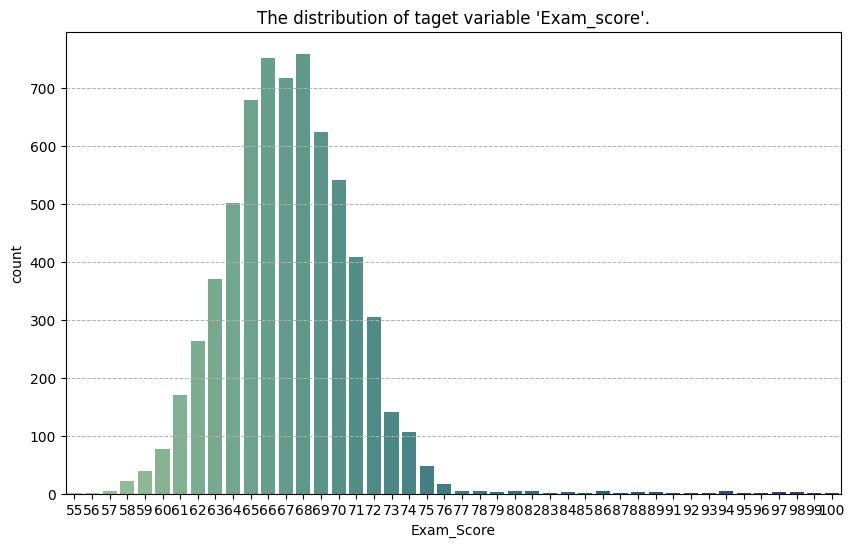

In [128]:
# Detailed distribution of target variable (Exam_score)
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Exam_Score"], palette='crest')
# Note : Count plot is normally used to show categorical values, but I preferred to use it for this feature
# because I wanted to see each score in detail.
plt.title("The distribution of taget variable 'Exam_score'.")
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

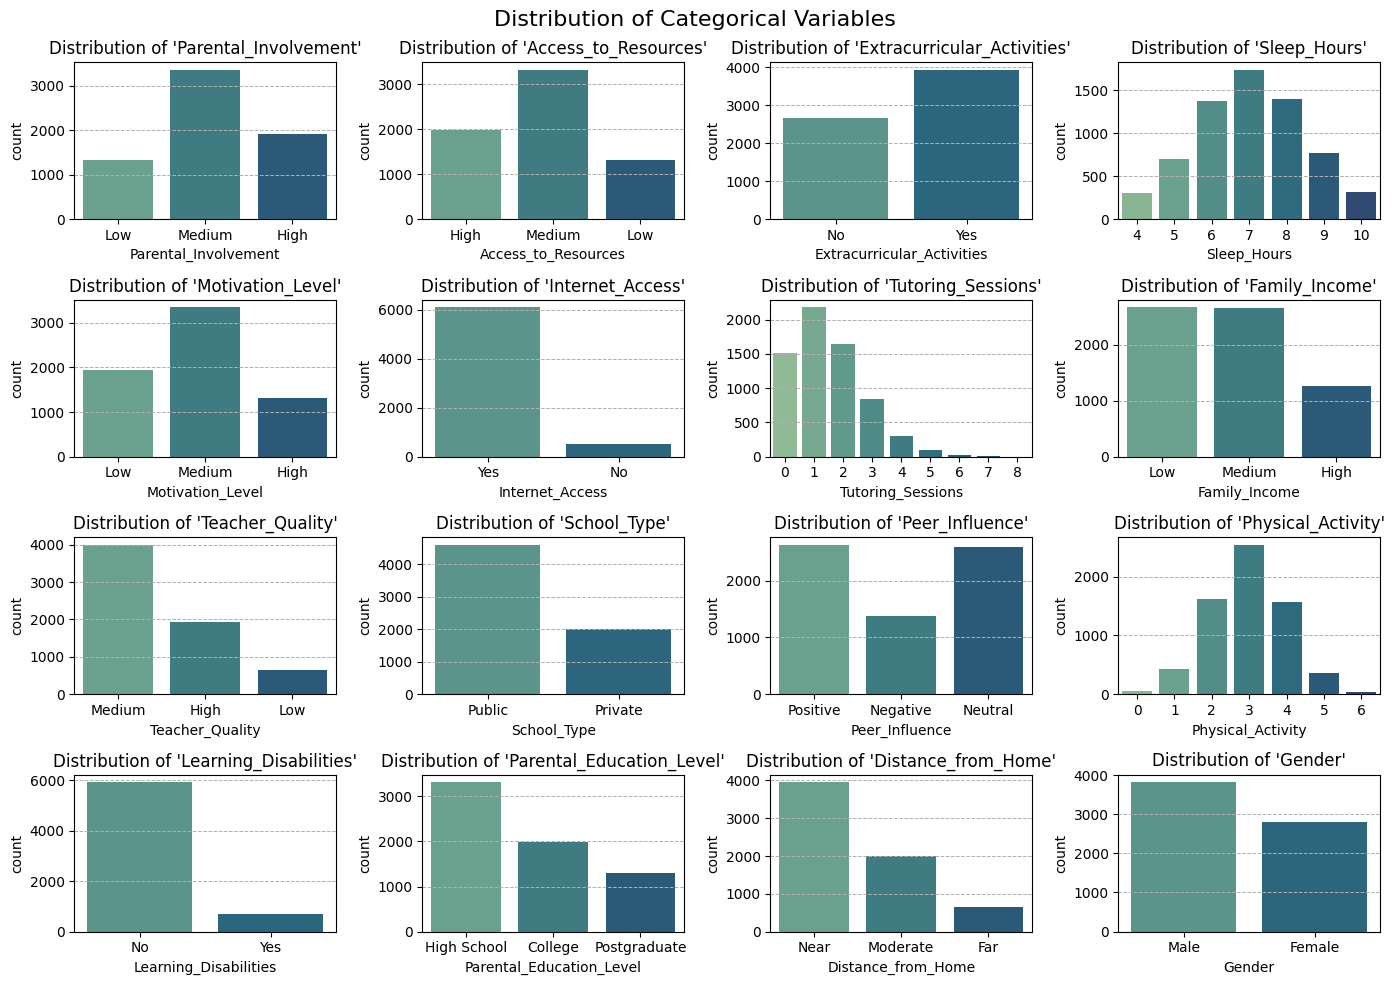

In [129]:
# Distribution of categorical features

fig, axes = plt.subplots(4, 4, figsize=(14, 10))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette='crest', ax=axes[i])
    axes[i].set_title(f"Distribution of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

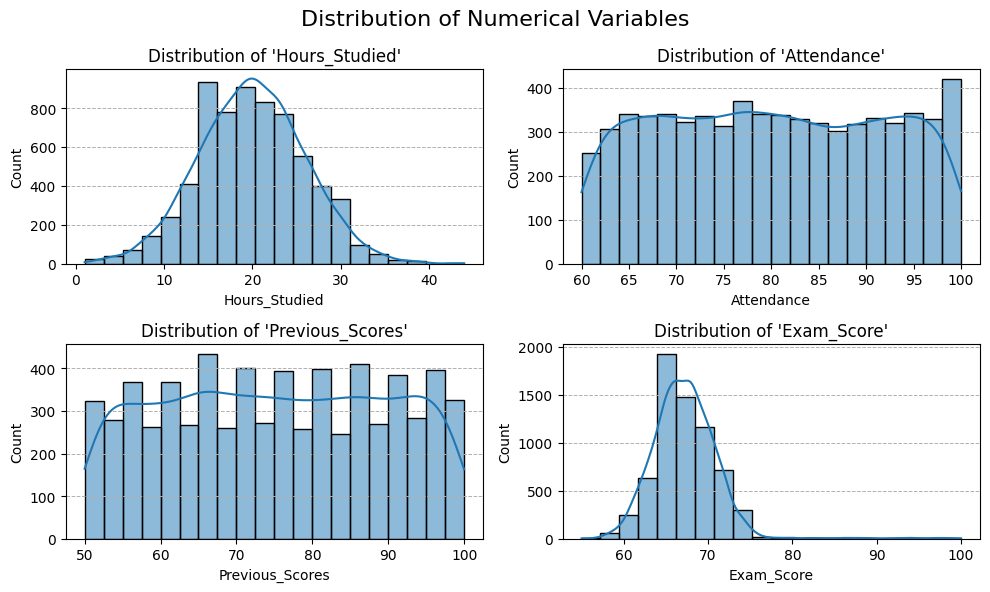

In [130]:
# Histogram of numerical features
fig , axes = plt.subplots(2,2,figsize=(10,6))
fig.suptitle("Distribution of Numerical Variables",fontsize=16)
axes = axes.ravel()
for i,col in enumerate(num_cols):
  sns.histplot(x=df[col],ax=axes[i],kde=True, bins=20)
  axes[i].set_title(f"Distribution of '{col}'")
  axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

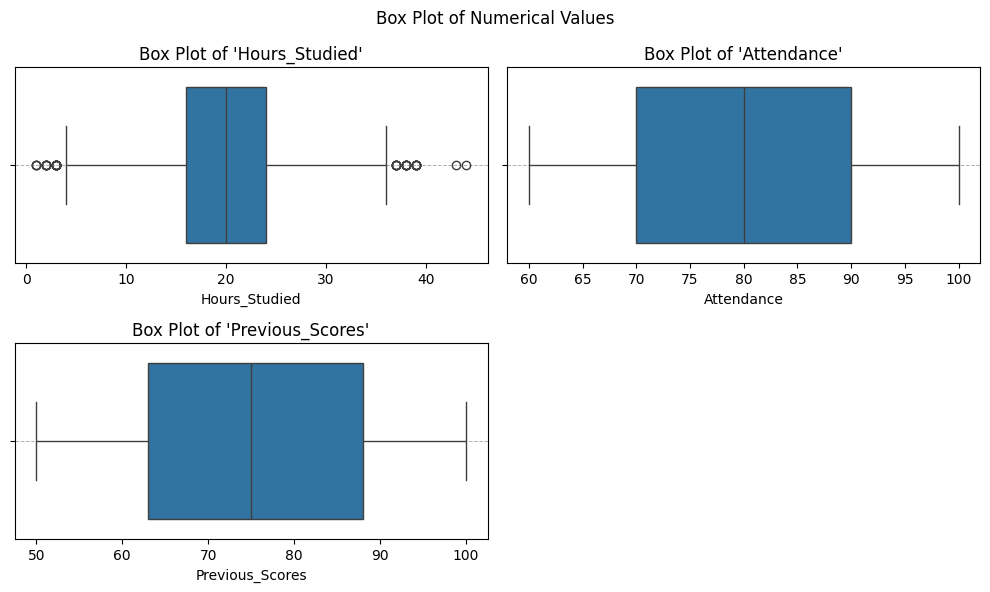

In [131]:
# Box plot of numerical features
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Box Plot of Numerical Values")
axes = axes.ravel()
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

Violin plot is a more advanced version of box plot. In addition to the information shown by the box plot, it also gives us information about the density of the distribution.

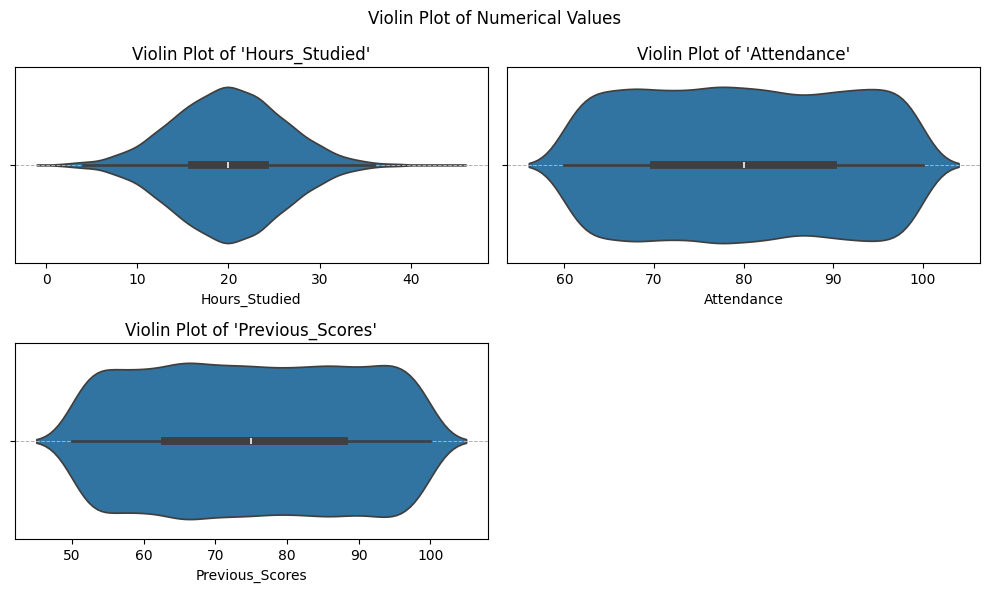

In [24]:
# Violin Plot of Numerical Values
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Violin Plot of Numerical Values")
axes = axes.ravel()

for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.violinplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of '{col}'")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

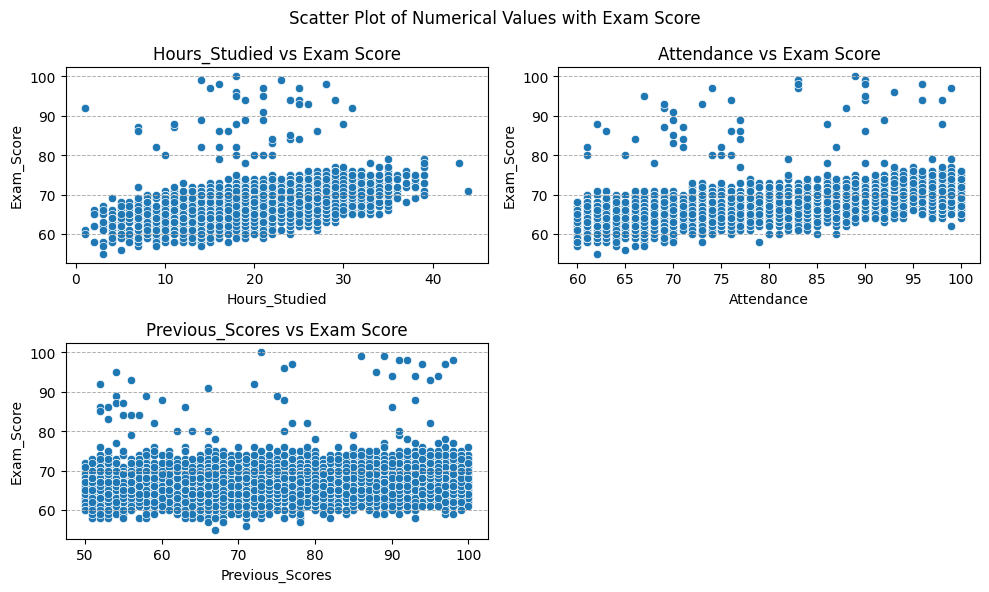

In [132]:
# Scatter plot for relationship between exam score and categorical variables

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Scatter Plot of Numerical Values with Exam Score")
axes = axes.ravel()
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i].axis('off')
        continue
    sns.scatterplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f"{col} vs Exam Score")
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

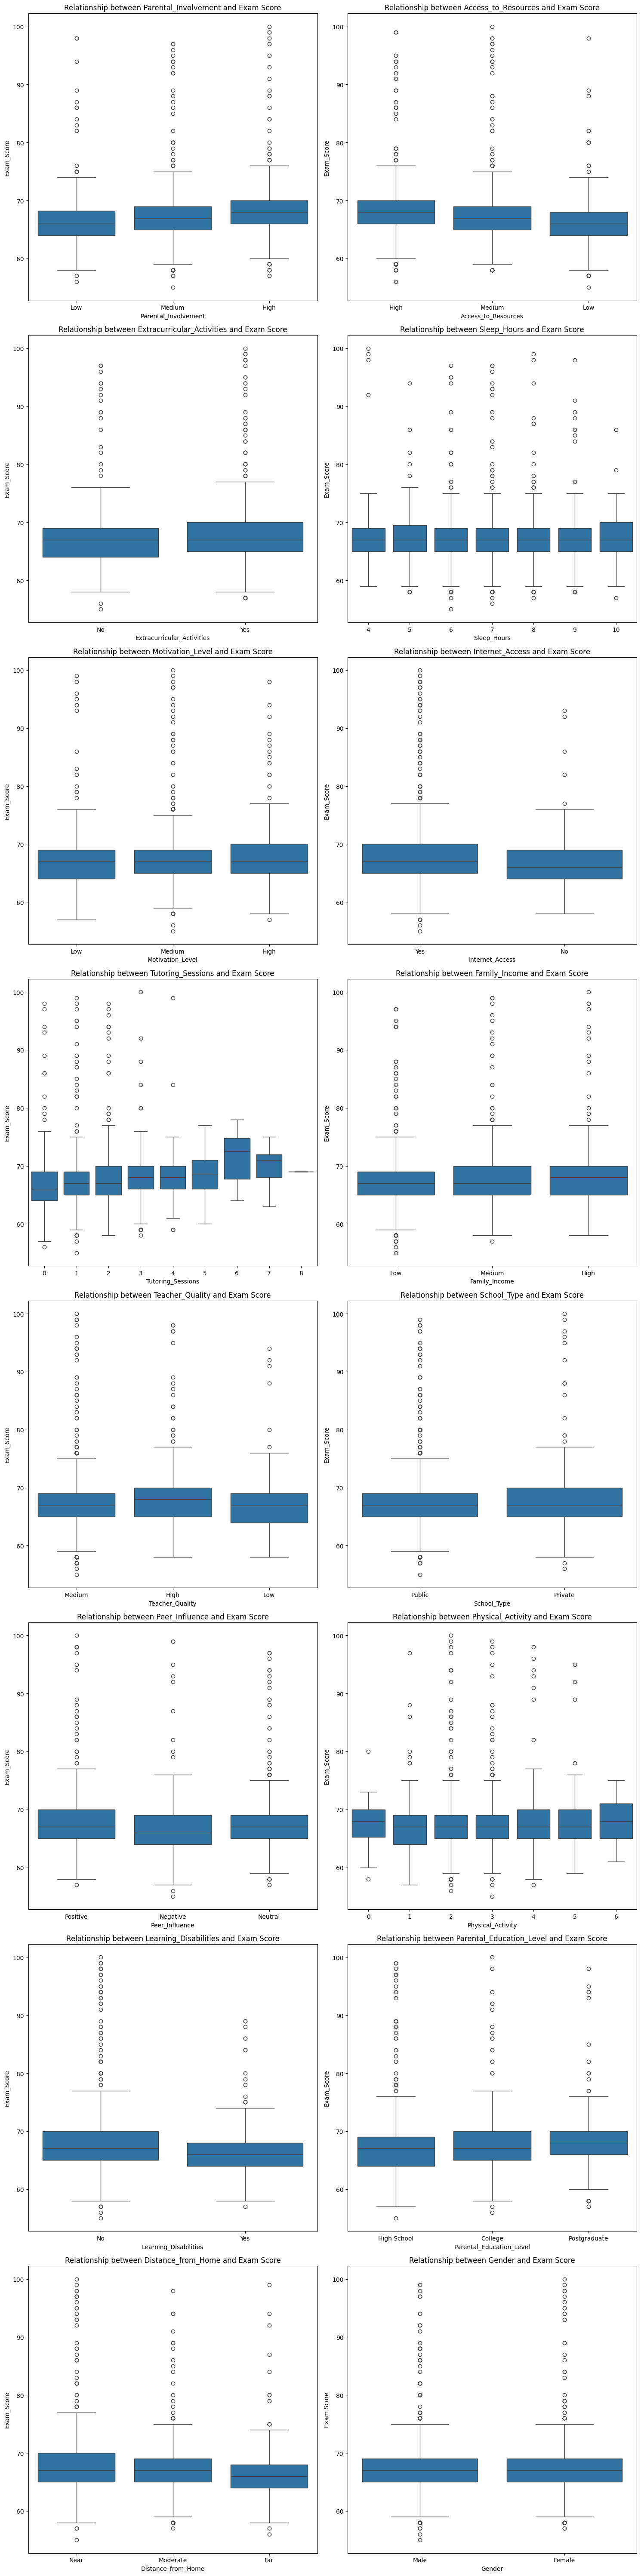

In [133]:
# Boxplot for relationship between exam score and categorical columns
fig, axes = plt.subplots(8, 2, figsize=(15, 60))

axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df["Exam_Score"], ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and Exam Score')
    plt.xlabel(col)
    plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()

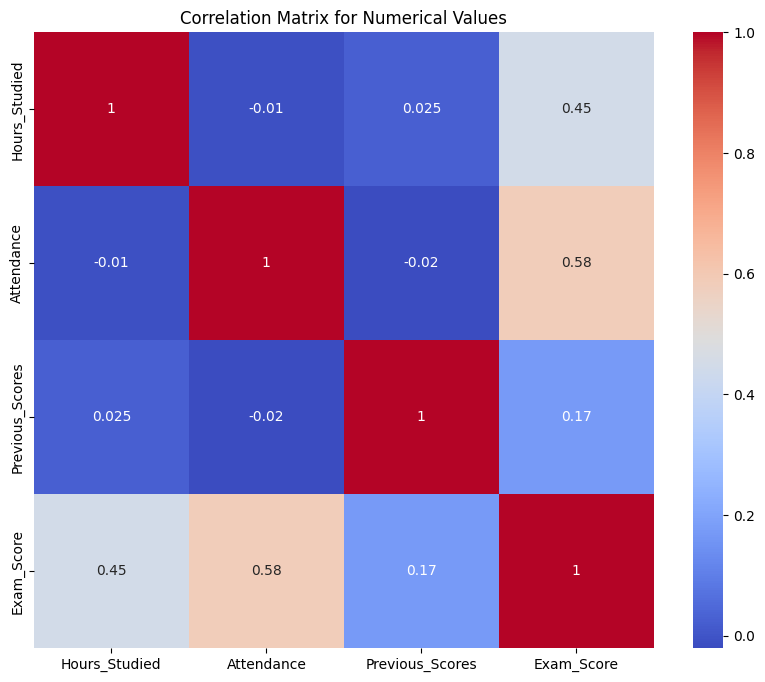

In [134]:
# Correlation matrix for Numerical Values
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix for Numerical Values")
plt.show()

For correlation analysis on categorical values we have to perform encoding on them.

# Label Encoding

Label encoding is necessary because many machine learning algorithms require numerical input. By converting categorical variables into numerical labels, we make the data compatible with models that cannot handle text directly.

In [88]:
print(unique_values)

Parental_Involvement                                [Low, Medium, High]
Access_to_Resources                                 [High, Medium, Low]
Extracurricular_Activities                                    [No, Yes]
Sleep_Hours                                      [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                                    [Low, Medium, High]
Internet_Access                                               [Yes, No]
Tutoring_Sessions                           [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                       [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low, nan]
School_Type                                           [Public, Private]
Peer_Influence                            [Positive, Negative, Neutral]
Physical_Activity                                 [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                         [No, Yes]
Parental_Education_Level      [High School, College, Postgraduat

Ordinal columns with an inherent order are encoded with predefined mappings,
while nominal categorical columns (without order) are encoded using label encoding.

In [89]:
ordered_data = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

label_columns = ['Gender', 'Extracurricular_Activities', "Internet_Access", "School_Type", "Learning_Disabilities"]

label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

def encode_dataframe(df, ordered_data):
    for column in df.columns:
        if column in ordered_data:
            encoding = ordered_data[column]
            df[column] = df[column].map(encoding)

encode_dataframe(df, ordered_data)


In [91]:
df.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   
5             19          88                     1                    1   
6             29          84                     1                    0   
7             25          78                     0                    2   
8             17          94                     1                    2   
9             23          98                     1                    1   

   Extracurricular_Activities Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0           7               73                 0   
1                           0           8               59                 0   
2                           1           7               91                 1   
3                           1           8               98                 1   
4                           1           6               65                 1   
5                           1           8               89                 1   
6                           1           7               68                 0   
7                           1           6               50                 1   
8                           0           6               80                 2   
9                           1           8               71                 1   

   Internet_Access Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                 0              0                1   
1                1                 2              1                1   
2                1                 2              1                1   
3                1                 1              1                1   
4                1                 3              1                2   
5                1                 3              1                1   
6                1                 1              0                1   
7                1                 1              2                2   
8                1                 0              1                0   
9                1                 0              2                2   

   School_Type  Peer_Influence Physical_Activity  Learning_Disabilities  \
0            1               2                 3                      0   
1            1               0                 4                      0   
2            1               1                 4                      0   
3            1               0                 4                      0   
4            1               1                 4                      0   
5            1               2                 3                      0   
6            0               1                 2                      0   
7            1               0                 2                      0   
8            0               1                 1                      0   
9            1               2                 5                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       1          67  
1                         1                   1       0          61  
2                         2                   0       1          74  
3                         0                   1       1          71  
4                         1                   0       0          70  
5                         2                   0       1          71  
6                         0                   1       1          67  
7                         0                   2       1          66  
8                         1                   0

# Scaler

In [94]:
# Initialize StandardScaler for features that are assumed to follow a normal distribution
scaler = StandardScaler()

# Apply standard scaling to 'Hours_Studied', 'Sleep_Hours', and 'Physical_Activity'
df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']] = scaler.fit_transform(
    df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']]
)

# Initialize MinMaxScaler for scaling features between a range (0, 1 by default)
min_max_scaler = MinMaxScaler()

# Apply min-max scaling to 'Attendance', 'Previous_Scores' and 'Tutoring_Session'
df[['Attendance', 'Previous_Scores', 'Tutoring_Sessions']] = min_max_scaler.fit_transform(
    df[['Attendance', 'Previous_Scores', 'Tutoring_Sessions']]
)

In [95]:
df.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.505133       0.600                     0                    2   
1      -0.162650       0.100                     0                    1   
2       0.672079       0.950                     1                    1   
3       1.506808       0.725                     0                    1   
4      -0.162650       0.800                     1                    1   
5      -0.162650       0.700                     1                    1   
6       1.506808       0.600                     1                    0   
7       0.839025       0.450                     0                    2   
8      -0.496541       0.850                     1                    2   
9       0.505133       0.950                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0    -0.019901             0.46                 0   
1                           0     0.661268             0.18                 0   
2                           1    -0.019901             0.82                 1   
3                           1     0.661268             0.96                 1   
4                           1    -0.701069             0.30                 1   
5                           1     0.661268             0.78                 1   
6                           1    -0.019901             0.36                 0   
7                           1    -0.701069             0.00                 1   
8                           0    -0.701069             0.60                 2   
9                           1     0.661268             0.42                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1              0.000              0                1   
1                1              0.250              1                1   
2                1              0.250              1                1   
3                1              0.125              1                1   
4                1              0.375              1                2   
5                1              0.375              1                1   
6                1              0.125              0                1   
7                1              0.125              2                2   
8                1              0.000              1                0   
9                1              0.000              2                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2           0.031414                      0   
1            1               0           1.001129                      0   
2            1               1           1.001129                      0   
3            1               0           1.001129                      0   
4            1               1           1.001129                      0   
5            1               2           0.031414                      0   
6            0               1          -0.938301                      0   
7            1               0          -0.938301                      0   
8            0               1          -1.908016                      0   
9            1               2           1.970843                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       1          67  
1                         1                   1       0          61  
2                         2                   0       1          74  
3                         0                   1       1          71  
4                         1                   0       0          70  
5                         2                   0       1          71  
6                         0                   1       1          67  
7                         0                   2       1          66  
8             

# 📊 EXTRA : I found perfect package for data quality profiling and exploratory data analysis . We can get extra insights by checking it out.

In [28]:
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [29]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]